In [108]:
# Importando la imagen
FILEID = "12ba7E_rxvkKXSElYQeOrZPBxpWQyv2QO"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Numpy_wolf_crop.jpeg && rm -rf /tmp/cookies.txt > /dev/null

--2022-04-08 00:47:03--  https://docs.google.com/uc?export=download&confirm=&id=12ba7E_rxvkKXSElYQeOrZPBxpWQyv2QO
Resolving docs.google.com (docs.google.com)... 173.194.210.101, 173.194.210.138, 173.194.210.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.210.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tk2g10oahock3275vj6ss86j1k4be3km/1649378775000/09711457892284675029/*/12ba7E_rxvkKXSElYQeOrZPBxpWQyv2QO?e=download [following]
--2022-04-08 00:47:04--  https://doc-14-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tk2g10oahock3275vj6ss86j1k4be3km/1649378775000/09711457892284675029/*/12ba7E_rxvkKXSElYQeOrZPBxpWQyv2QO?e=download
Resolving doc-14-60-docs.googleusercontent.com (doc-14-60-docs.googleusercontent.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to doc-14-60-docs.googleusercontent.com (doc-1

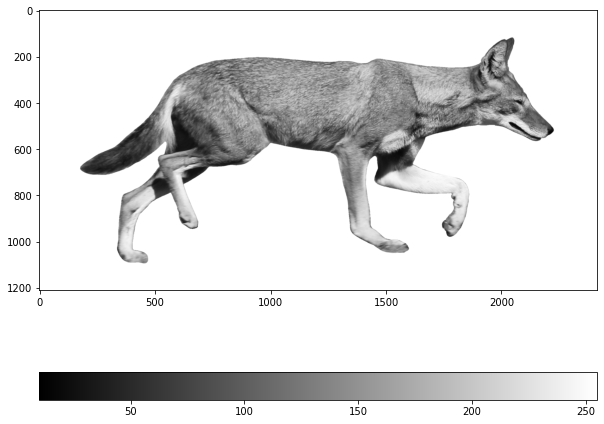

In [109]:
#Paquetes, módulos y funciones de interés:
from cv2 import imread
import matplotlib.pyplot as plt
import numpy as np


img = imread('./Numpy_wolf_crop.jpeg', 0) #Read image in grayscale and return in a numpy array
#Graficando la imagen:
fig = plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.colorbar(orientation='horizontal')

In [110]:
class CutPicture():
  """
  Descripción: Clase para crear objetos que tine como atributo una imagen y métodos para recortar la misma de distintas formas
  -----------------------------------------------------------------------------------------------------------------------------
  -----------------------------------------------------------------------------------------------------------------------------
  Atributos:
  img(array): Es la imagen, que se puede ir modificando con los métodos
  orig(array): Es la imagen original
  -----------------------------------------------------------------------------------------------------------------------------
  -----------------------------------------------------------------------------------------------------------------------------
  Métodos:
  -__rank_left_up(método privado): retorna el número de la columna hasta la cual se debe recortar, si quiero cortar la parte izquierda
  y el número de la fila hasta la cual se debe recortar si quiero recortar por arriba.

  -__rank_right_down(método privado): retorna el número de la columna hasta la cual se debe recortar, si quiero cortar la parte derecha
  y el número de la fila hasta la cual se debe recortar si quiero recortar por abajo.

  -cut_up(método público): Recorta la imagen por la parte de arriba y la gráfica. El parámetro grap es para indicar si quiere graficar o no la imagen recortada.
  -cut_left(método público): Recorta la imagen por la parte izquiera y la gráfica. El parámetro grap es para indicar si quiere graficar o no la imagen recortada.
  -cut_right(método público): Recorta la imagen por la parte derecha y la gráfica. El parámetro grap es para indicar si quiere graficar o no la imagen recortada.
  -cut_down(método público): Recorta la imagen por la parte de abajo y la gráfica. El parámetro grap es para indicar si quiere graficar o no la imagen recortada.
  -cut_rectan(método público): Recorta la imagen de forma rectangular y la gráfica.
  -grahp_origin(método público): Grafica la imagen original.

  """

  def __init__(self,img):
    self.img=img
    self.orig=img.copy()

  def __rank_left_up(self):
    no_interes=np.where(self.img!=255)
    first_fila=no_interes[0].min()
    first_colum=no_interes[1].min()
    return first_fila,first_colum

  def __rank_right_down(self):
    no_interes=np.where(self.img!=255)
    last_fila=no_interes[0].max()
    last_colum=no_interes[1].max()
    return last_fila,last_colum
    
    

  def cut_up(self,grap=None):
    first_fila,first_colum=self.__rank_left_up()
    self.img=np.delete(self.img,np.s_[0:first_fila],axis=0)
    
    
    if grap=="graficar":
      fig = plt.figure(figsize=(10,10))
      plt.imshow(self.img, cmap='gray')
      plt.colorbar(orientation='horizontal')

  def cut_left(self,grap=None):
    first_fila,first_colum=self.__rank_left_up()
    self.img=np.delete(self.img,np.s_[0:first_colum],axis=1)
  
    
    if grap=="graficar":
      fig = plt.figure(figsize=(10,10))
      plt.imshow(self.img, cmap='gray')
      plt.colorbar(orientation='horizontal')

  def cut_down(self,grap=None):
    last_fila,last_colum=self.__rank_right_down()
    self.img=np.delete(self.img,np.s_[last_fila:(self.img.shape[0]-1)],axis=0)
  
    if grap=="graficar":
      fig = plt.figure(figsize=(10,10))
      plt.imshow(self.img, cmap='gray')
      plt.colorbar(orientation='horizontal')

  def cut_right(self,grap=None):
    last_fila,last_colum=self.__rank_right_down()
    self.img=np.delete(self.img,np.s_[last_colum:(self.img.shape[1]-1)],axis=1)
  
    if grap=="graficar":
      fig = plt.figure(figsize=(10,10))
      plt.imshow(self.img, cmap='gray')
      plt.colorbar(orientation='horizontal')

  def cut_rectan(self):
    self.cut_down()
    self.cut_left()
    self.cut_right()
    self.cut_up()
    fig = plt.figure(figsize=(10,10))
    plt.imshow(self.img, cmap='gray')
    plt.colorbar(orientation='horizontal')

  def graph_origin(self):
    fig = plt.figure(figsize=(10,10))
    plt.imshow(self.orig, cmap='gray')
    plt.colorbar(orientation='horizontal')

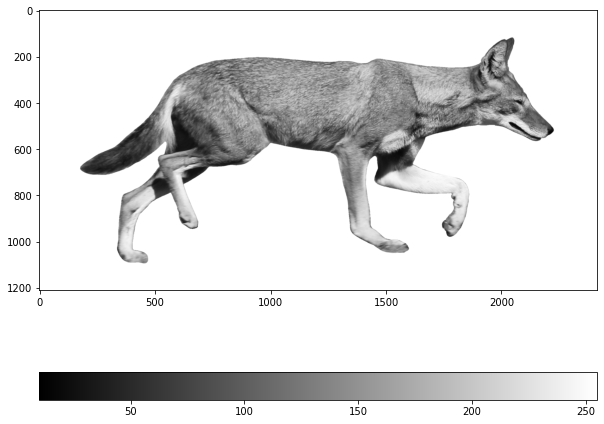

In [111]:
imagen=CutPicture(img) #Creo el objeto
imagen.graph_origin() #Grafico la imagen original

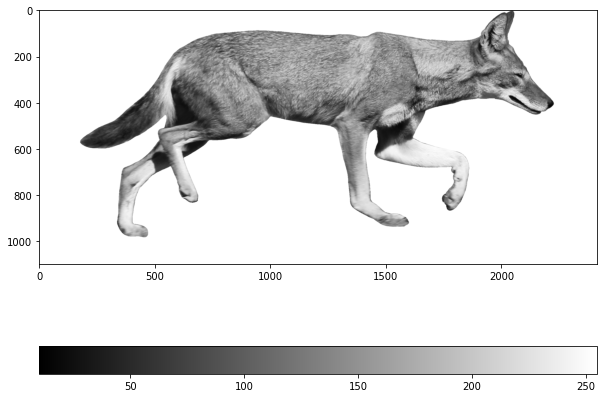

In [112]:
imagen.cut_up(grap="graficar") #Imagen recortada por la parte de arriba

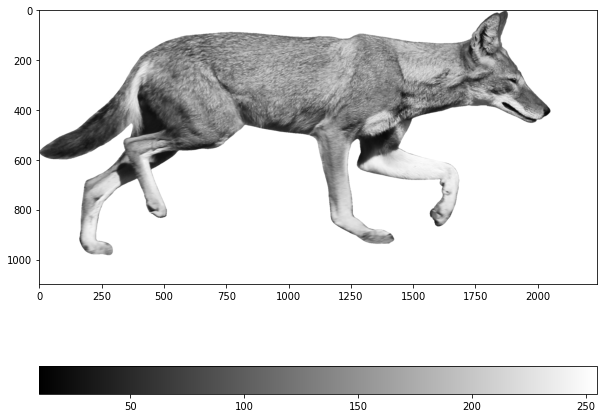

In [113]:
imagen.cut_left(grap="graficar") #Imagen recortada por la parte izquierda

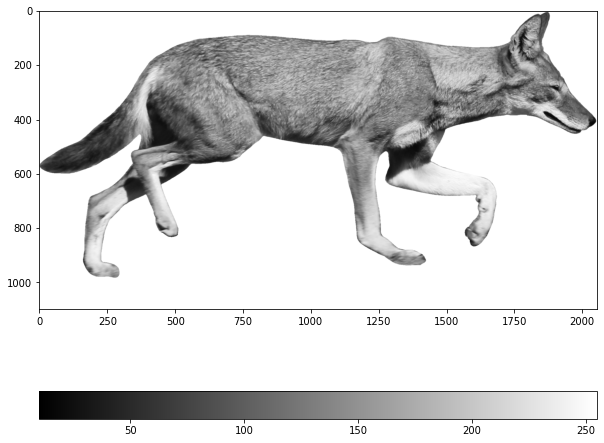

In [114]:
imagen.cut_right(grap="graficar") #Imagen recortada por la derecha

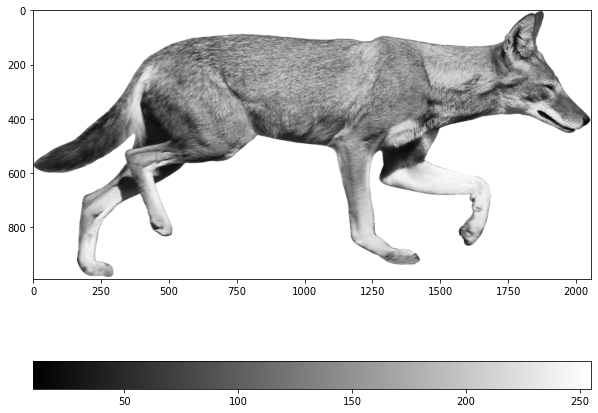

In [115]:
imagen.cut_down(grap="graficar") #Imagen recortada por la parte de abajo

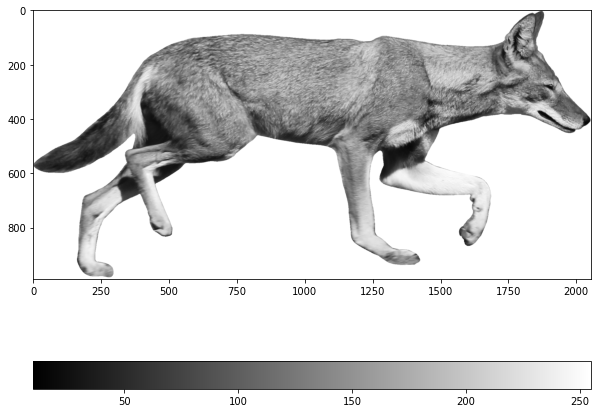

In [116]:
imagen.cut_rectan() 